In [1]:
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skbio.stats.composition import clr, centralize
from scipy.spatial.distance import euclidean,braycurtis,jaccard
from skbio.stats.composition import clr
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
%matplotlib inline

First we will import the simulation data and the KL-divergence results with or without rclr preprocessing

In [2]:

#simulation view
simulation=pd.read_csv('cluster_models/simulation_subsampled_noisy.csv', index_col=[0,1,2,3])
model_100=simulation.loc[(2,20,4000,),:]

#import and view results from simuilation
cluster_results=pd.read_csv('cluster_models/results.csv')
cluster_results = cluster_results[cluster_results.Sequence_Depth>500]



/anaconda3/envs/qiime2-2018.8/lib/python3.5/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Next we will generate a toy dataset example for Euclidean distance vs. Robust Aitchison
 

In [3]:

#toy
n = 50
t = np.linspace(1, 10, n)
x1 = np.exp(t) * 0.001
x2 = np.random.normal(size=n) + 100
x3 = np.random.normal(size=n) * 10 + 100
X = np.vstack((x1, x2, x3)).T
edists = [euclidean(X[0, :], X[i, :]) for i in range(X.shape[0])]
cdists = [euclidean(clr(X[0, :]), clr(X[i, :])) for i in range(X.shape[0])]


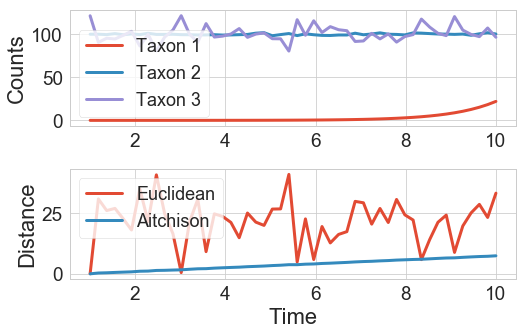

In [4]:
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib import ticker
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['xtick.labelsize']=20

fig = plt.figure(figsize=(8, 6), facecolor='white')
gs = gridspec.GridSpec(113, 100) 

ax_ex1=plt.subplot(gs[20:60, :120])
ax_ex2=plt.subplot(gs[75:113, :120])

ticksize=19
labelsize=22
ax_ex1.plot(t, x1, label='Taxon 1',lw=3)
ax_ex1.plot(t, x2, label='Taxon 2',lw=3)
ax_ex1.plot(t, x3, label='Taxon 3',lw=3)
ax_ex1.legend() 
ax_ex1.set_ylabel('Counts', fontsize=labelsize)
ax_ex1.xaxis.set_tick_params(labelsize=ticksize)
ax_ex1.yaxis.set_tick_params(labelsize=ticksize)
ax_ex1.legend(prop={'size': 18})

ax_ex2.plot(t, edists, label='Euclidean',lw=3)
ax_ex2.plot(t, cdists, label='Aitchison',lw=3)
ax_ex2.xaxis.set_tick_params(labelsize=ticksize)
ax_ex2.yaxis.set_tick_params(labelsize=ticksize)
ax_ex2.legend()
ax_ex2.set_xlabel('Time', fontsize=labelsize)
ax_ex2.set_ylabel('Distance', fontsize=labelsize)
ax_ex2.legend(loc=2,prop={'size': 18})

plt.savefig('figures/figure2.png',dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

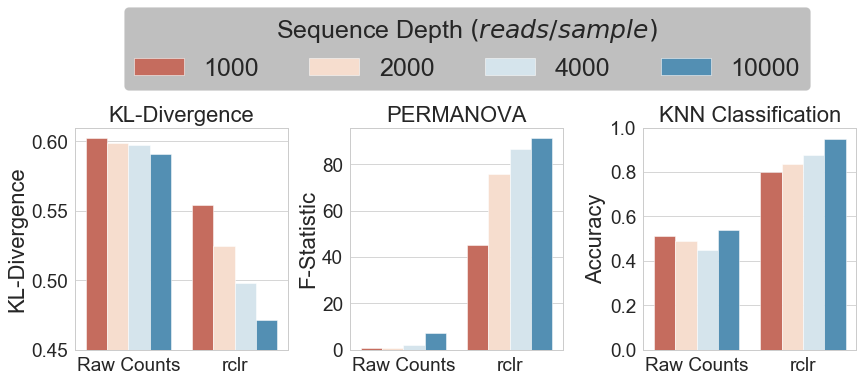

In [6]:
fig = plt.figure(figsize=(14, 6), facecolor='white')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20


gs = gridspec.GridSpec(110, 128)

ax1 = plt.subplot(gs[25:100, :35]) 
ax2 = plt.subplot(gs[25:100, 45:80])
ax3 = plt.subplot(gs[25:100, 93:128])

#sns.heatmap(clr(model_100.as_matrix()+1),robust=True
#            , xticklabels=False, yticklabels=False,
#           cbar=False,cmap='RdBu_r',ax=ax1)
#ax1.set_xlabel('Features',fontsize=22)
#ax1.set_ylabel('Samples',fontsize=22)
#ax1.set_title('Simulation (1,000 reads/sample)',fontsize=18)


ax1.tick_params(axis='both', which='major', labelsize=19)
sns.barplot(x='Method',y='value',hue='Sequence_Depth'
            ,data=cluster_results[cluster_results.Metric.isin(['KL-Div'])]
           ,palette='RdBu',ax=ax1)
#ax1.set_yscale('log')
ax1.set_ylim(.45,.61)
ax1.set_xlabel('')
ax1.set_ylabel('KL-Divergence',fontsize=22)
ax1.set_title('KL-Divergence',fontsize=22)
ax1.legend_.remove()

ax2.tick_params(axis='both', which='major', labelsize=19)
sns.barplot(x='Method',y='value',hue='Sequence_Depth'
            ,data=cluster_results[cluster_results.Metric.isin(['F-Statistic'])]
           ,palette='RdBu',ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('F-Statistic',fontsize=22)
ax2.set_title('PERMANOVA',fontsize=22)
ax2.legend_.remove()


ax3.tick_params(axis='both', which='major', labelsize=19)
sns.barplot(x='Method',y='value',hue='Sequence_Depth'
            ,data=cluster_results[cluster_results.Metric.isin(['KNN_Accuracy'])]
           ,palette='RdBu',ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Accuracy',fontsize=22)
ax3.set_title('KNN Classification',fontsize=22)
ax3.set_ylim(0,1)
legend = ax3.legend(loc=2, 
            bbox_to_anchor=(-2.5, 1.6),
            prop={'size':25},
            fancybox=True, framealpha=0.5,ncol=5
            , markerscale=2, facecolor="grey",
                   title='Sequence Depth $(reads/sample)$')
legend.get_title().set_fontsize(25)

plt.savefig('figures/figure3.png',dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
